# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Scrape the Table

Save the table using the Pandas `read_html` function.

In [2]:
# Confirm DataFrame was created successfully
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
mars_df = df[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 2: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [3]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [4]:
# Change data types for data analysis
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')

In [5]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 3: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [6]:
# 1. How many months are there on Mars?

# Saving the unique months from the months column in the dataframe
months = mars_df['month'].unique()

# Printing the length of the unique months list
print(f'There are {len(months)} months on Mars')

There are 12 months on Mars


In [7]:
# 2. How many Martian days' worth of data are there?

# Saving the days from the sol column in the dataframe
days = mars_df['sol']

#Printing the length of the list
print(f'There are {len(days)} days worth of data')

There are 1867 days worth of data


In [8]:
# 3. What is the average low temperature by month?

# Saving the averages in a new dataframe grouped by month
avg_temp_df = mars_df.groupby("month").mean()

# Saving the minimum average temps in a new variable then displaying them
low_temps = avg_temp_df['min_temp']
low_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

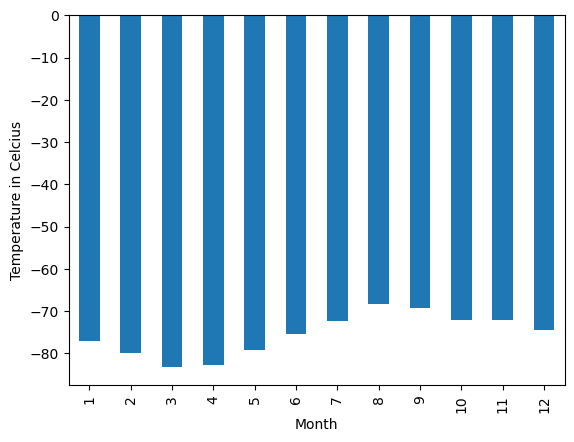

In [9]:
# Plot the average temperature by month
low_temps.plot.bar()
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.show()

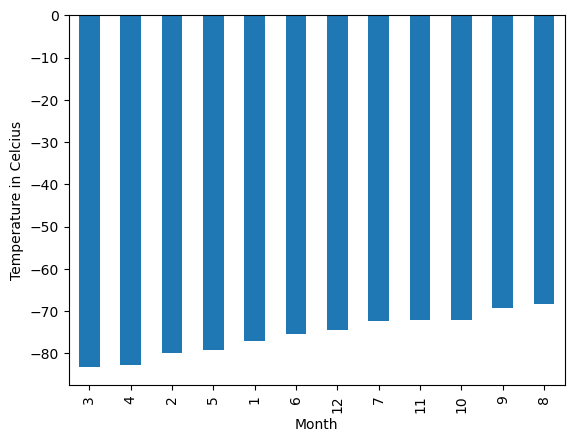

In [10]:
# Identify the coldest and hottest months in Curiosity's location

# Sorting the average temperatures by month and plotting to see which month is the highest/lowest
low_temps.sort_values().plot.bar()
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.show()

In [11]:
# 4. Average pressure by Martian month

# Saving the averages in a new dataframe grouped by month
avg_temp_df = mars_df.groupby("month").mean()

# Saving the average pressures in a new variable then displaying them
avg_pressure = avg_temp_df['pressure']
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

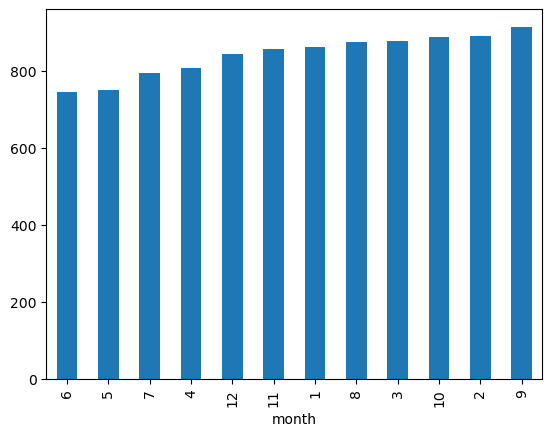

In [12]:
# Plot the average pressure by month

# Sorting the average pressures by month and plotting to see which month is the highest/lowest
avg_pressure.sort_values().plot.bar()
plt.show()

In [13]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Creating an empty list to hold the number of days that are in the data set
num_days = []

# Appending numbers to that list for the length of the data set (total number of days in the data set)
for x in range(len(mars_df)):
    num_days.append(x+1) 

In [14]:
# Adding the number of days list to the dataframe as a new column

mars_df["Number of Days"] = num_days
mars_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure,Number of Days
0,2,2012-08-16,10,155,6,-75.0,739.0,1
1,13,2012-08-17,11,156,6,-76.0,740.0,2
2,24,2012-08-18,12,156,6,-76.0,741.0,3
3,35,2012-08-19,13,157,6,-74.0,732.0,4
4,46,2012-08-20,14,157,6,-74.0,740.0,5
5,57,2012-08-21,15,158,6,-78.0,740.0,6
6,68,2012-08-22,16,158,6,-77.0,740.0,7
7,79,2012-08-23,17,159,6,-76.0,742.0,8
8,112,2012-08-27,21,161,6,-74.0,741.0,9
9,114,2012-08-28,22,162,6,-74.0,742.0,10


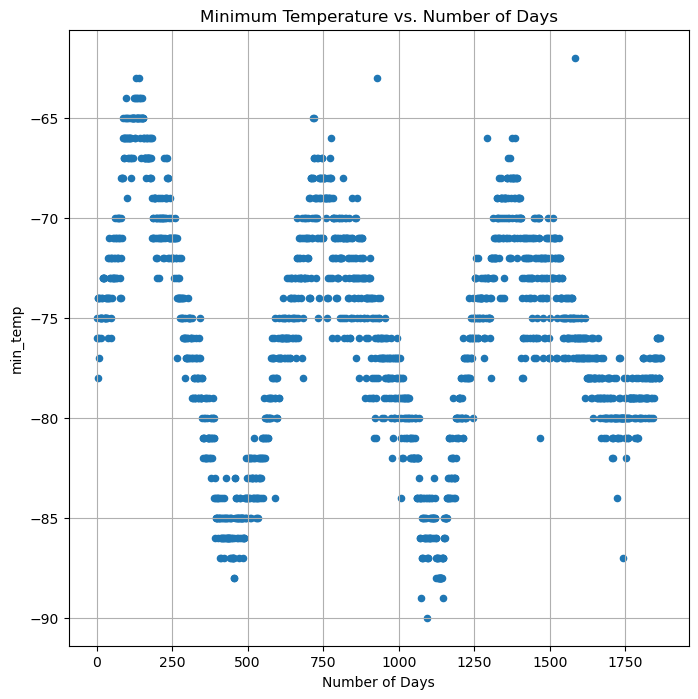

In [15]:
# Plotting the temperatures vs. the number of days

mars_df.plot(kind="scatter", x="Number of Days", y="min_temp", grid=True, figsize=(8,8),
              title="Minimum Temperature vs. Number of Days")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [16]:
# Write the data to a CSV
mars_df.to_csv('mars_df.csv')